In [8]:
# Dependencies
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from pprint import pprint
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [9]:
zip_data = "Project1_County_Data.csv"
zip_data_df = pd.read_csv(zip_data, dtype=str, low_memory=False)

In [11]:
zip_data_df.columns

Index(['Name', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Count', 'Poverty Rate',
       'Total No HS Diploma', 'No High School Diploma Rate',
       'Total HS Diploma', 'HS Diploma Rate', 'Total Some College',
       'Some College Rate', 'Total College Degrees', 'College Degree Rate',
       'Total educational attainment over 25', 'Never Married',
       'Never Married Rate', 'Married', 'Married Rate', 'Widowed',
       'Widowed Rate', 'Divorced', 'Divorced Rate', 'Over 15 Marital Status'],
      dtype='object')

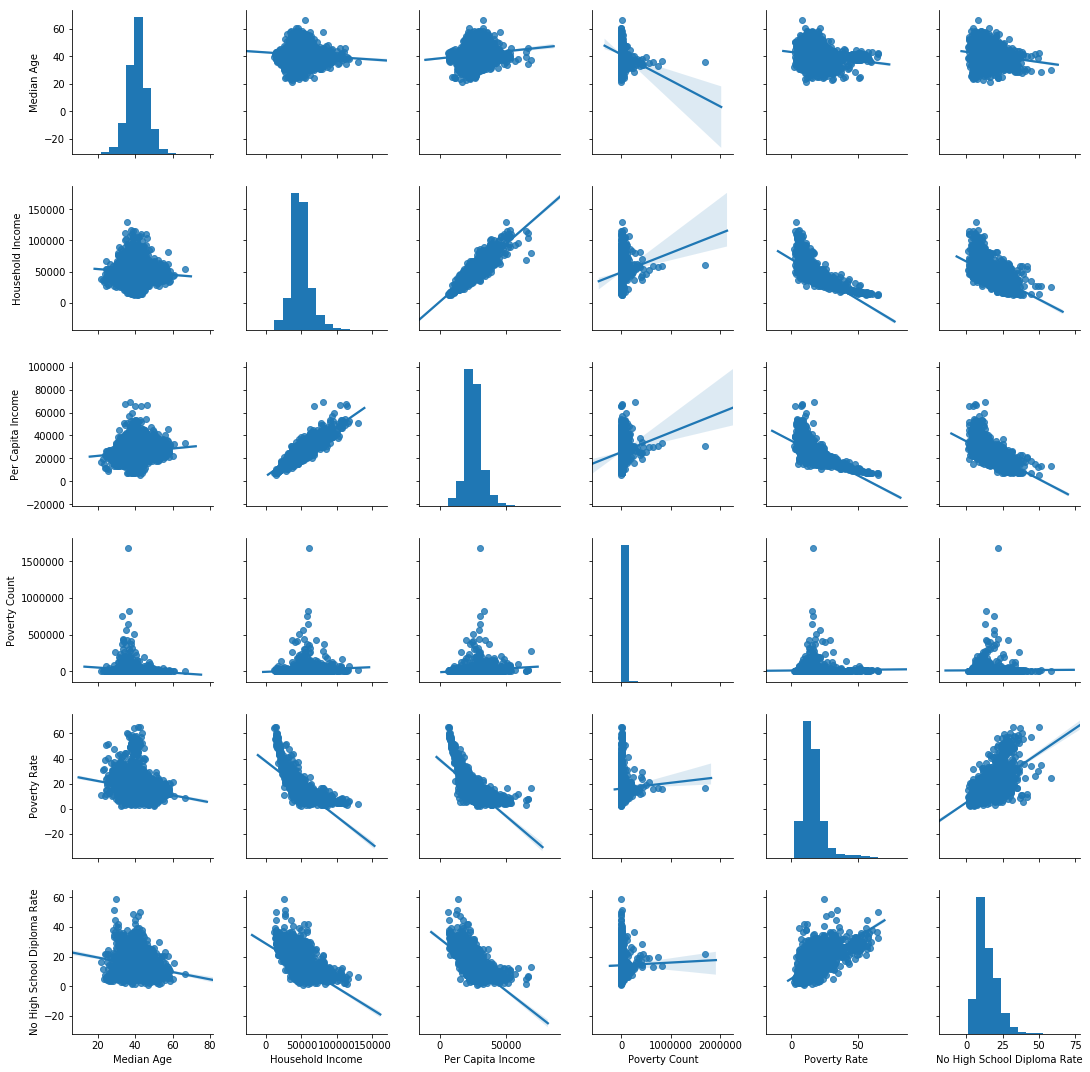

In [16]:
# household income vs total no hs diploma scatter plot

# convert columns to float for processing
zip_data_df["Median Age"] = zip_data_df["Median Age"].astype(float)
zip_data_df["Household Income"] = zip_data_df["Household Income"].astype(float)
zip_data_df["Per Capita Income"] = zip_data_df["Per Capita Income"].astype(float)
zip_data_df["Poverty Count"] = zip_data_df["Poverty Count"].astype(float)
zip_data_df["Poverty Rate"] = zip_data_df["Poverty Rate"].astype(float)
zip_data_df["No High School Diploma Rate"] = zip_data_df["No High School Diploma Rate"].astype(float)
zip_data_df = zip_data_df.dropna()

# create a new df containing all numeric columns
census_data_numeric = zip_data_df[["Median Age", "Household Income", "Per Capita Income", \
                                            "Poverty Count", "Poverty Rate", "No High School Diploma Rate"]]

# seaborn pair plot
sns.pairplot(census_data_numeric, kind="reg")

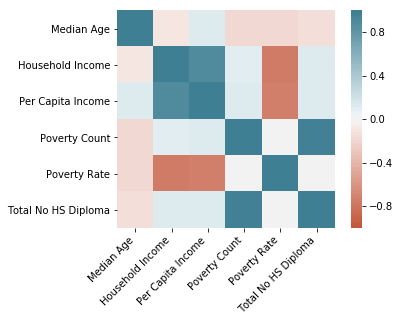

In [13]:
# heat map on correlation matrix
corr = census_data_numeric.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

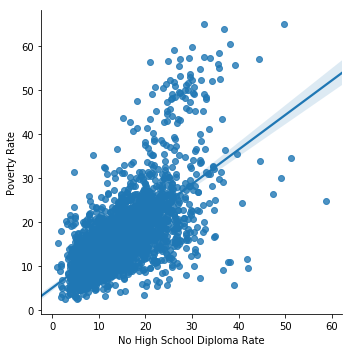

In [18]:
sns.lmplot(y='Poverty Rate', x='No High School Diploma Rate', data=census_data_numeric)

In [19]:
census_data_numeric['No High School Diploma Rate'].corr(census_data_numeric['Poverty Rate'])

0.6663471166593976

In [72]:
zip_data_df["Poverty Rate"] = zip_data_df["Poverty Rate"].astype(float)
zip_data_df["No HS Diploma Rate"] = zip_data_df["No HS Diploma Rate"].astype(float)
    

In [73]:
# create a new df containing all numeric columns
county_data_numeric = zip_data_df[["Poverty Rate", "No HS Diploma Rate"]]

In [76]:
print(county_data_numeric.describe())

       Poverty Rate  No HS Diploma Rate
count   3220.000000         3220.000000
mean      16.174182           14.160805
std        8.078167            6.840526
min        2.424187            1.123596
25%       11.055315            9.079076
50%       14.808937           12.606424
75%       19.108649           18.325759
max       65.146881           58.651026


In [114]:
zip_data_df["Per Capita Income"] = zip_data_df["Per Capita Income"].astype(float)
zip_data_df["College Degree Rate"] = zip_data_df["College Degree Rate"].astype(float)

In [115]:
# create a new df containing all numeric columns
collegecounty_data_numeric = zip_data_df[["Per Capita Income", "College Degree Rate"]]

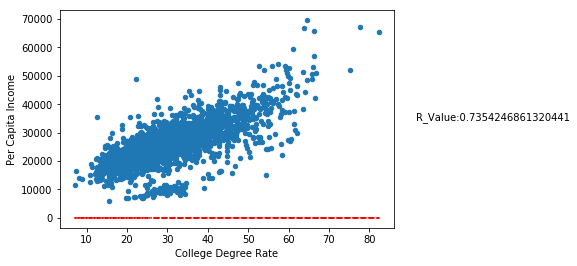

In [119]:
# use linear regression to fit poverty rate and no hs diploma rate 
(slope, intercept, r_value, _, _) = linregress(collegecounty_data_numeric["Per Capita Income"], collegecounty_data_numeric["College Degree Rate"])
fit = slope * collegecounty_data_numeric["College Degree Rate"] + intercept

collegecounty_data_numeric.plot.scatter(x="College Degree Rate", y="Per Capita Income")
plt.plot(collegecounty_data_numeric["College Degree Rate"], fit, 'r--')
plt.figtext(.95, .5, f"R_Value:{ r_value }")

plt.savefig("./Data/CollegePerCapitavalue.png")

In [80]:
zip_data_df["Poverty Rate"] = zip_data_df["Poverty Rate"].astype(float)
zip_data_df["College Degree Rate"] = zip_data_df["College Degree Rate"].astype(float)

In [81]:
# create a new df containing all numeric columns
collegecounty_data_numeric = zip_data_df[["Poverty Rate", "College Degree Rate"]]

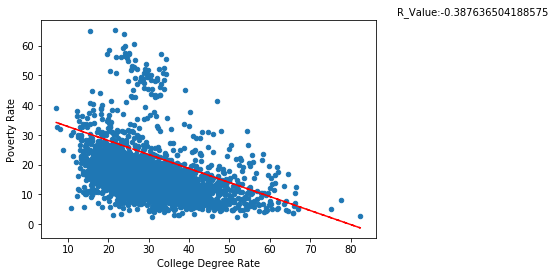

In [90]:
# use linear regression to fit poverty rate and no hs diploma rate 
(slope, intercept, r_value, _, _) = linregress(collegecounty_data_numeric["Poverty Rate"], collegecounty_data_numeric["College Degree Rate"])
fit = slope * collegecounty_data_numeric["College Degree Rate"] + intercept

collegecounty_data_numeric.plot.scatter(x="College Degree Rate", y="Poverty Rate")
plt.plot(collegecounty_data_numeric["College Degree Rate"], fit, 'r--')
plt.figtext(.95, .9, f"R_Value:{ r_value }")

plt.savefig("./Data/CollegePovertyratervalue.png")

In [87]:
r_value

-0.387636504188575

In [107]:
# create a new df containing all numeric columns
collegecounty_data_numeric = zip_data_df[["Poverty Rate", "College Degree Rate"]]

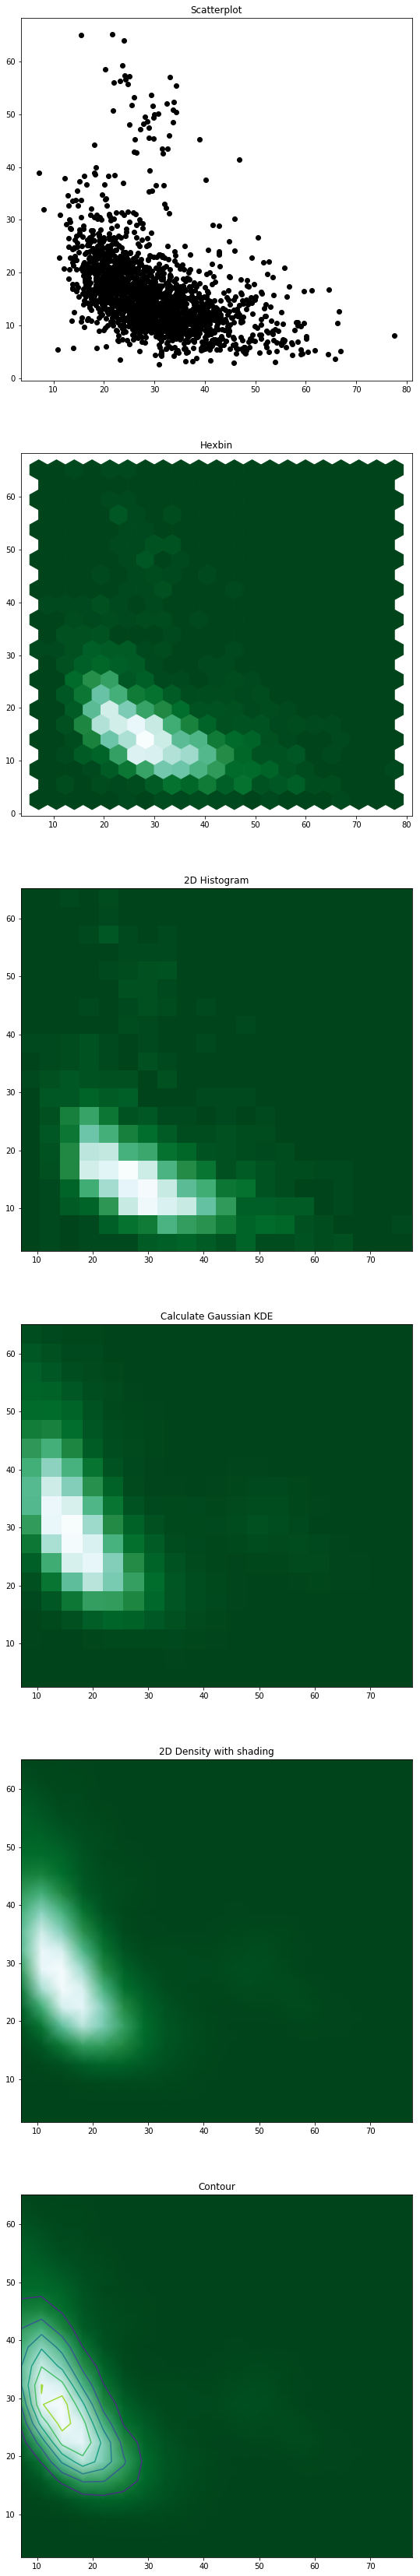

In [113]:
from scipy.stats import kde
 

# Create data: 1000 points
data= collegecounty_data_numeric['Poverty Rate'].sample(n=2000, random_state=1), collegecounty_data_numeric['College Degree Rate'].sample(n=2000, random_state=1)

x = collegecounty_data_numeric['College Degree Rate'].sample(n=2000, random_state=1)
y = collegecounty_data_numeric['Poverty Rate'].sample(n=2000, random_state=1)
 
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=1, nrows=6, figsize=(9, 60))
 
# Everything sarts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(x, y, 'ko')
# As you can see there is a lot of overplottin here!
 
# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)
 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
axes[3].set_title('Calculate Gaussian KDE')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.BuGn_r)
 
# add shading
axes[4].set_title('2D Density with shading')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
 
# contour
axes[5].set_title('Contour')
axes[5].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes[5].contour(xi, yi, zi.reshape(xi.shape) )



plt.savefig("./Data/CollegePovertyratervalue2.png")

In [91]:
zip_data_df["Poverty Rate"] = zip_data_df["Poverty Rate"].astype(float)
zip_data_df["No HS Diploma Rate"] = zip_data_df["No HS Diploma Rate"].astype(float)

In [92]:
nohscounty_data_numeric = zip_data_df[["Poverty Rate", "No HS Diploma Rate"]]

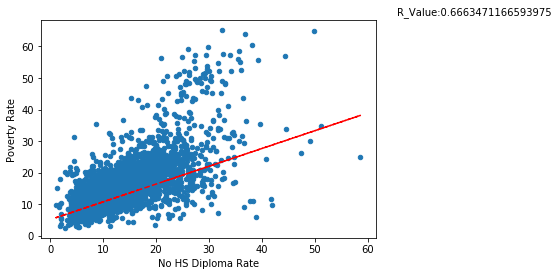

In [93]:
# use linear regression to fit poverty rate and no hs diploma rate 
(slope, intercept, r_value, _, _) = linregress(nohscounty_data_numeric["Poverty Rate"], nohscounty_data_numeric["No HS Diploma Rate"])
fit = slope * nohscounty_data_numeric["No HS Diploma Rate"] + intercept

nohscounty_data_numeric.plot.scatter(x="No HS Diploma Rate", y="Poverty Rate")
plt.plot(nohscounty_data_numeric["No HS Diploma Rate"], fit, 'r--')
plt.figtext(.95, .9, f"R_Value:{ r_value }")

plt.savefig("./Data/NoHSPovertyratervalue.png")

In [48]:
zip_data_df["Poverty Rate"] = zip_data_df["Poverty Rate"].astype(float)
zip_data_df["HS Diploma Rate"] = zip_data_df["HS Diploma Rate"].astype(float)

In [49]:
county_data_numeric = zip_data_df[["Poverty Rate", "HS Diploma Rate"]]

Text(0.95, 0.5, 'R_Value:0.09994916159951697')

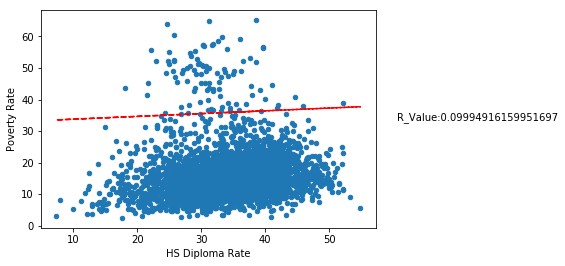

In [52]:
# use linear regression to fit poverty rate and no hs diploma rate 
(slope, intercept, r_value, _, _) = linregress(county_data_numeric["Poverty Rate"], county_data_numeric["HS Diploma Rate"])
fit = slope * county_data_numeric["HS Diploma Rate"] + intercept

county_data_numeric.plot.scatter(x="HS Diploma Rate", y="Poverty Rate")
plt.plot(county_data_numeric["HS Diploma Rate"], fit, 'r--')
plt.figtext(.95, .5, f"R_Value:{ r_value }")

#plt.savefig("./Data/HSPovertyratervalue.png")

In [7]:
# create a new df containing all numeric columns
county_data_numeric = zip_data_df[["Poverty Rate", "No HS Diploma Rate"]]

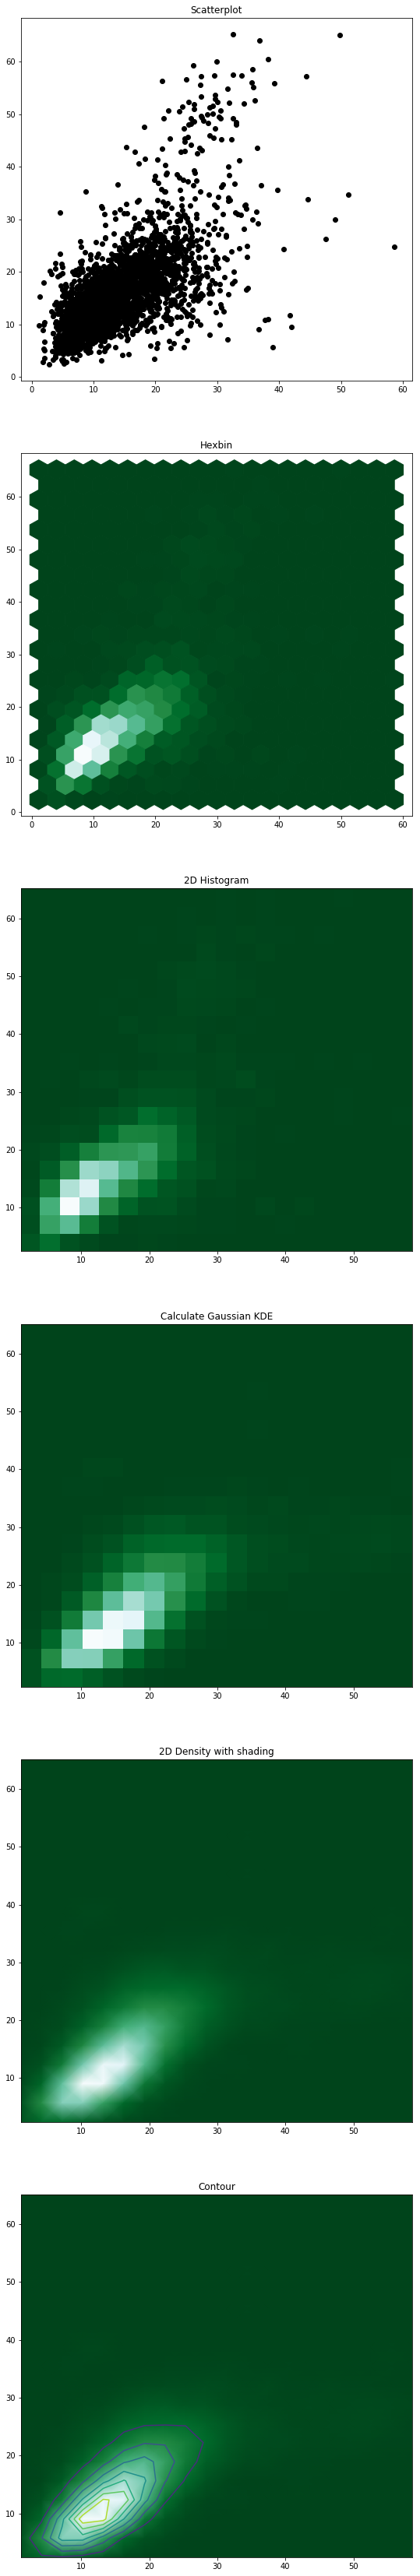

In [38]:
from scipy.stats import kde
 

# Create data: 1000 points
data= county_data_numeric['Poverty Rate'].sample(n=1000, random_state=1), county_data_numeric['No HS Diploma Rate'].sample(n=1000, random_state=1)

x = county_data_numeric['No HS Diploma Rate']
#.sample(n=1000, random_state=1)
y = county_data_numeric['Poverty Rate']
#.sample(n=1000, random_state=1)
 
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=1, nrows=6, figsize=(9, 60))
 
# Everything sarts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(x, y, 'ko')
# As you can see there is a lot of overplottin here!
 
# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)
 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
axes[3].set_title('Calculate Gaussian KDE')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.BuGn_r)
 
# add shading
axes[4].set_title('2D Density with shading')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
 
# contour
axes[5].set_title('Contour')
axes[5].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes[5].contour(xi, yi, zi.reshape(xi.shape) )



plt.savefig("./Data/NoHSPovertyratervalue2.png")

In [37]:
plt.savefig("./Data/NoHSPovertyratervalue2.png")

<Figure size 432x288 with 0 Axes>